In [2]:
%matplotlib inline
# %config InlineBackend.figure_format = 'retina'
# %config InlineBackend.print_figure_kwargs = {'bbox_inches':'tight'}

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib
from astropy.table import Table

matplotlib.rcParams.update({'font.size':18})
matplotlib.rcParams.update({'font.family':'serif'})

In [3]:
file = '/Users/james/Desktop/gaia_tmp/GaiaDR2_vrad_vel_col.fits'
# from this paper -- https://arxiv.org/abs/1804.10607
vtble = Table.read(file, format='fits')

In [4]:
vtble.columns

<TableColumns names=('source_id','ra','dec','parallax','e_parallax','pmra','e_pmra','pmdec','e_pmdec','vrad','e_vrad','GMag','dist','el_dist','eu_dist','rGC','el_rGC','eu_rGC','RGC','el_RGC','eu_RGC','xGC','el_xGC','eu_xGC','yGC','el_yGC','eu_yGC','zGC','el_zGC','eu_zGC','U','el_U','eu_U','V','el_V','eu_V','W','el_W','eu_W','UW','el_UW','eu_UW','vR','el_vR','eu_vR','vtot','el_vtot','eu_vtot','P_ub','parallax_pmra_corr','parallax_pmdec_corr','pmra_pmdec_corr','phot_bp_mean_mag','phot_rp_mean_mag')>

In [5]:
#  MIST isochrone
Mnames = ('EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 
          'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U', 'Bessell_B', 'Bessell_V', 
          'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 
          'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Gaia_BP_DR2Rev', 
          'Gaia_RP_DR2Rev', 'TESS', 'phase')

Mfile = '../../gaia2_kep_rot/iso/mist/MIST_v1.1_vvcrit0.4_UBVRIplus/MIST_v1.1_feh_p0.25_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'
#MIST_v1.1_feh_p0.00_afe_p0.0_vvcrit0.4_UBVRIplus.iso.cmd'
mist = pd.read_table(Mfile, delim_whitespace=True, comment='#', names=Mnames)

mist_ms1 = np.where((mist['phase']==0) & 
                    (mist['log10_isochrone_age_yr'] == 9.) & 
                    (mist['Gaia_G_DR2Rev'] > 2))[0][::-1]

mist_ms2 = np.where((mist['log10_isochrone_age_yr'] == 9.6))[0][::-1]



In [66]:
ok = np.where(np.isfinite(vtble['phot_bp_mean_mag']) & 
              np.isfinite(vtble['phot_rp_mean_mag']) & 
              np.isfinite(vtble['GMag']) & 
              (vtble['e_parallax']/vtble['parallax'] < 0.01) & 
              (vtble['GMag'] < 16) & 
              (vtble['dist'] < 300))
print(ok[0].shape)


(528699,)


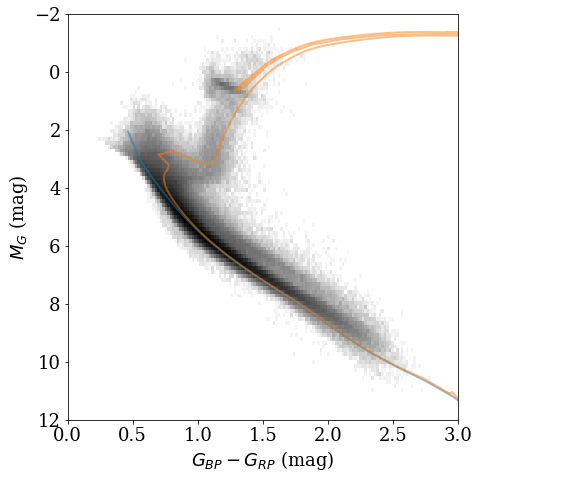

In [67]:
plt.figure(figsize=(7,7))
plt.hist2d(vtble['phot_bp_mean_mag'][ok] - vtble['phot_rp_mean_mag'][ok], 
               vtble['GMag'][ok] - 5. * np.log10(vtble['dist'][ok])  + 5, 
               bins=(200,100), cmap=plt.cm.Greys, norm=LogNorm())
plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
         mist['Gaia_G_DR2Rev'].values[mist_ms1], lw=2, alpha=0.5)
plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms2] - mist['Gaia_RP_DR2Rev'].values[mist_ms2], 
         mist['Gaia_G_DR2Rev'].values[mist_ms2], lw=2, alpha=0.5)


plt.ylim(12,-2);
plt.xlim(0,3);
plt.xlabel('$G_{BP} - G_{RP}$ (mag)');
plt.ylabel('$M_G$ (mag)');
plt.tight_layout()


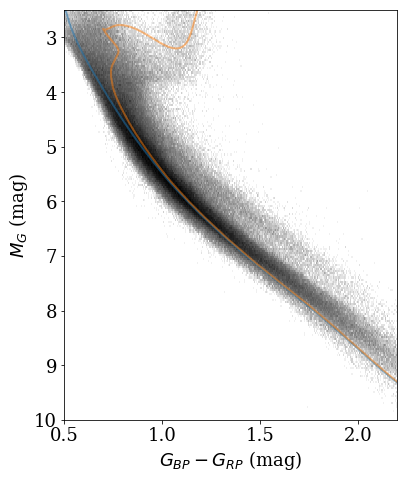

In [68]:
plt.figure(figsize=(6,7))

_ = plt.hist2d(vtble['phot_bp_mean_mag'][ok] - vtble['phot_rp_mean_mag'][ok], 
               vtble['GMag'][ok] - 5. * np.log10(vtble['dist'][ok])  + 5, 
               bins=(300,200), cmap=plt.cm.Greys, norm=LogNorm(), range=[[0.5,2.2],[2.5,10]]);

plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
         mist['Gaia_G_DR2Rev'].values[mist_ms1], lw=2, alpha=0.5)
plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms2] - mist['Gaia_RP_DR2Rev'].values[mist_ms2], 
         mist['Gaia_G_DR2Rev'].values[mist_ms2], lw=2, alpha=0.5)



plt.ylim(10, 2.5);
plt.xlim(0.5, 2.2);
plt.xlabel('$G_{BP} - G_{RP}$ (mag)');
plt.ylabel('$M_G$ (mag)');
plt.tight_layout()


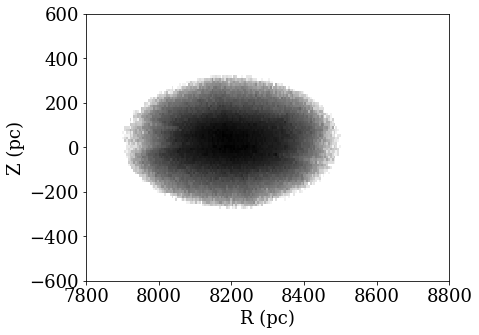

In [69]:
plt.figure(figsize=(7,5))
_ = plt.hist2d(vtble['RGC'][ok], vtble['zGC'][ok],
               bins=(200,100), cmap=plt.cm.Greys, norm=LogNorm(), range=[[7800,8800],[-600,600]])
plt.xlabel('R (pc)')
plt.ylabel('Z (pc)')
# plt.xlim(7800,8800)
# plt.ylim(-500,500)
plt.tight_layout()
plt.savefig('RZ.png', dpi=300, bbox_inches='tight', pad_inches=0.25)

In [70]:
Mg_iso_mist = np.interp(vtble['phot_bp_mean_mag'][ok] - vtble['phot_rp_mean_mag'][ok], 
                        mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
                        mist['Gaia_G_DR2Rev'].values[mist_ms1])

delta_mag_mist = Mg_iso_mist - (vtble['GMag'][ok] - 5. * np.log10(vtble['dist'][ok])  + 5)

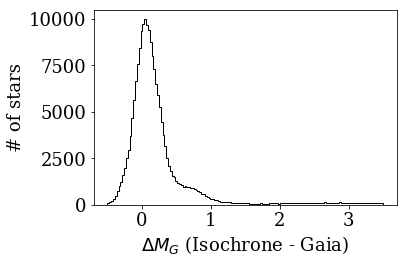

In [71]:
dok = np.where(np.isfinite(delta_mag_mist) & 
               (Mg_iso_mist >= 5.5) & 
               (Mg_iso_mist <= 7))

plt.figure()
_ = plt.hist(delta_mag_mist[dok], range=(-0.5,3.5), bins=150, histtype='step', lw=1, color='k')

plt.ylabel('# of stars');
plt.xlabel(r'$\Delta M_G$ (Isochrone - Gaia)');
plt.tight_layout()


In [81]:
s1 = np.where((delta_mag_mist[dok] > -0.3) & (delta_mag_mist[dok] < 0.25))
s2 = np.where((delta_mag_mist[dok] > 0.6) & (delta_mag_mist[dok] < 1.2))

print(s1[0].shape, s2[0].shape)

((131473,), (12786,))


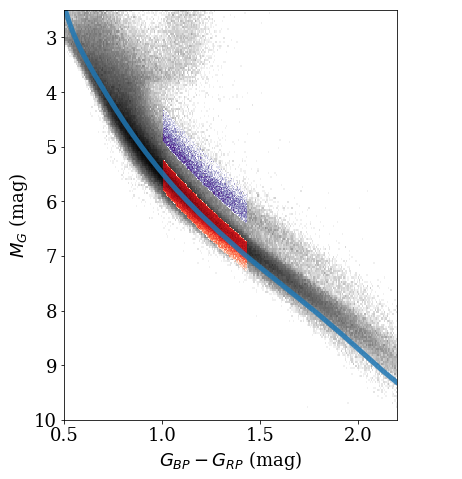

In [82]:
plt.figure(figsize=(6,7))

_ = plt.hist2d(vtble['phot_bp_mean_mag'][ok] - vtble['phot_rp_mean_mag'][ok], 
               vtble['GMag'][ok] - 5. * np.log10(vtble['dist'][ok])  + 5, 
               bins=(300,200), cmap=plt.cm.Greys, norm=LogNorm(), range=[[0.5, 2.5],[2.5, 10]]);

_ = plt.hist2d(vtble['phot_bp_mean_mag'][ok][dok][s1] - vtble['phot_rp_mean_mag'][ok][dok][s1], 
               vtble['GMag'][ok][dok][s1] - 5. * np.log10(vtble['dist'][ok][dok][s1])  + 5, 
               bins=(100,100), cmap=plt.cm.Reds, norm=LogNorm());

_ = plt.hist2d(vtble['phot_bp_mean_mag'][ok][dok][s2] - vtble['phot_rp_mean_mag'][ok][dok][s2], 
               vtble['GMag'][ok][dok][s2] - 5. * np.log10(vtble['dist'][ok][dok][s2])  + 5, 
               bins=(100,100), cmap=plt.cm.Purples, norm=LogNorm());


plt.plot(mist['Gaia_BP_DR2Rev'].values[mist_ms1] - mist['Gaia_RP_DR2Rev'].values[mist_ms1], 
         mist['Gaia_G_DR2Rev'].values[mist_ms1], lw=5, alpha=0.85)

plt.ylim(10, 2.5);
plt.xlim(0.5, 2.2);
plt.xlabel('$G_{BP} - G_{RP}$ (mag)');
plt.ylabel('$M_G$ (mag)');
plt.tight_layout()
plt.savefig('cmd_two.png', dpi=300, bbox_inches='tight', pad_inches=0.25)


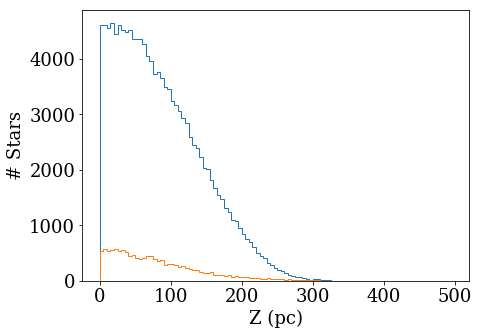

In [83]:
plt.figure(figsize=(7,5))
h1 = plt.hist(np.abs(vtble['zGC'][ok][dok][s1]), histtype='step', bins=np.arange(0,500,5))
h2 = plt.hist(np.abs(vtble['zGC'][ok][dok][s2]), histtype='step', bins=np.arange(0,500,5))
plt.xlabel('Z (pc)')
plt.ylabel('# Stars')
plt.tight_layout()



/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


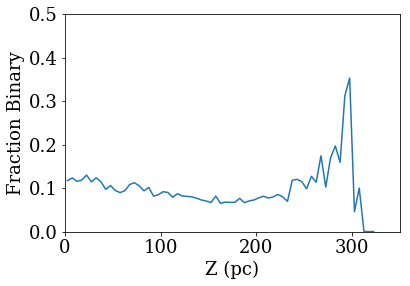

In [84]:
plt.figure()

plt.plot((h1[1][1:] + h1[1][:-1]) / 2., h2[0]/h1[0])
plt.ylabel('Fraction Binary')
plt.xlabel('Z (pc)')
plt.xlim(0,350)
plt.ylim(0,.5)
plt.savefig('BF.png', dpi=300, bbox_inches='tight', pad_inches=0.25)

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


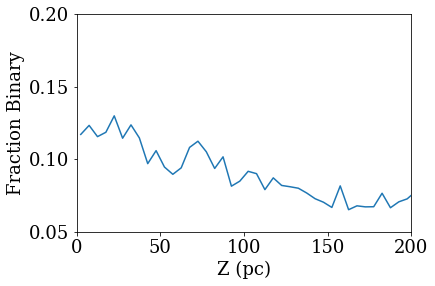

In [85]:
plt.figure()

plt.plot((h1[1][1:] + h1[1][:-1]) / 2., h2[0]/h1[0])
plt.ylabel('Fraction Binary')
plt.xlabel('Z (pc)')
plt.xlim(0,200)
plt.ylim(0.05, 0.2)
plt.savefig('BF1.png', dpi=300, bbox_inches='tight', pad_inches=0.25)

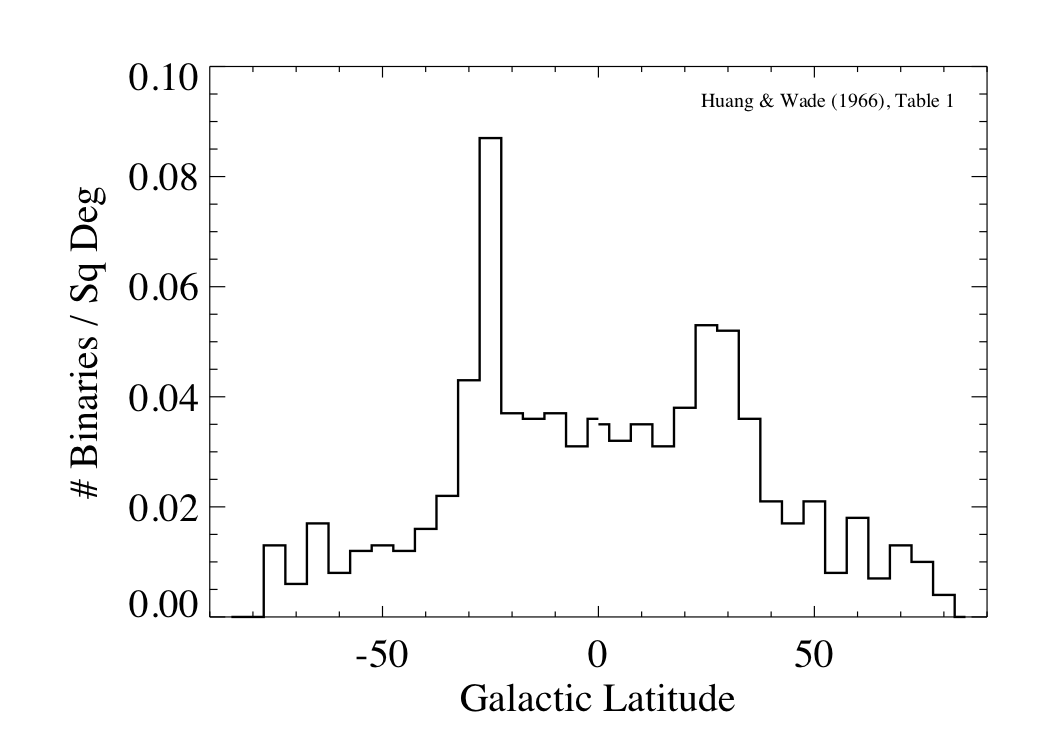

In [86]:
from IPython.display import Image
Image(filename='h96.png', width=500) 